# Mackoy & Sarah Project Title Here 
## Sub Heading Here 
### Description of Project (Goals, Stakes, Summarize Findings Here) 

In [9]:
# NOTE TO SELVES 
"""
stake holder: residential real estate 
we can fram our analysis around pitching high end house vs. middle class housing 
PRICE WILL ALWAYS BE OUR DEPENDENT VARI 
indepentdent variables include but are not limitied  to: waterfront, beds & baths, grade (sarah loves zipcodes so i can experiment with those on my own <3)

        2015 is our most recent year, our data just covers 1 year p  much 2014-2015
        
9/11 update: price, sqft_living, zipcode, living15, lot15, bedrooms, bathrooms, floors, keep condition & grade,  yr_built 

we can feature engineer a bedroom/bathroom ratio 


"divising a model that can help predict purchase price based on the attributes of the home --> so firms can better prepare their client for the pre-approval process"

Stakeholder
A Real Estate Company
Business problem
Devising a model that can help predict purchase price according to attributes of a home.
This way they can prepare their clients early on for what pre-approval amount they need.
EDA
Removed Nulls
Filled in empty values with unknown
Removed columns that didn’t have information we would use.
Removed outliers through 3 standard deviations.
For each column, it first computes the Z-score of each value in the column, relative to the column mean and standard deviation. It then takes the absolute Z-score because the direction does not matter, only if it is below the threshold. all(axis=1) ensures that for each row, all column satisfy the constraint. Finally, the result of this condition is used to index the dataframe.
First simple model
Created a simple model based on price and square foot as that had the highest correlation.
Modeling process
Still honing in on what predictors to use for our multilinear regression.
Need to make sure we check the assumptions before finalizing this.

"""

'\nstake holder: residential real estate \nwe can fram our analysis around pitching high end house vs. middle class housing \nPRICE WILL ALWAYS BE OUR DEPENDENT VARI \nindepentdent variables include but are not limitied  to: waterfront, beds & baths, grade (sarah loves zipcodes so i can experiment with those on my own <3)\n\n        2015 is our most recent year, our data just covers 1 year p  much 2014-2015\n        \n9/11 update: price, sqft_living, zipcode, living15, lot15, bedrooms, bathrooms, floors, keep condition & grade,  yr_built \n\nwe can feature engineer a bedroom/bathroom ratio \n\n\n"divising a model that can help predict purchase price based on the attributes of the home --> so firms can better prepare their client for the pre-approval process"\n\n'

# Importing Necessary Libraries & Loading Data

In [54]:
#importing libraries 
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats
from sklearn.linear_model import LinearRegression


In [4]:


data = pd.read_csv('data/kc_house_data.csv')
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


# Data Exploration

In [5]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [6]:
#check for missing data 
data.info()
#waterfront missing 2,376
#view missing 63 values
#year reno missing 3,842


# date is an object --> put that into date time 
# sqft_basement is an object --> put that into numeric & there aree also missing valyes (bc there is no basement)
#whats up with year reno 
#water front has missing too 
# we can dummy: 
    # water front 
    # condition 
    # grade
    # zipcode 
    


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [7]:
#NULLS 
# water front had 19221/21597
# view has 21534 / 21597 --> 19422 had "none" for view; only 2,112 values had a view 
# yr_reno had 117755/21597
data['view'].value_counts()

NONE         19422
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64

In [8]:
# looking at correlations 

potential_corrs = data.corr()['price'].map(abs).sort_values(ascending=False)
potential_corrs

#looks like: price & sqft_living has the biggest impact also sqft_above, bathroom is p good 

price            1.000000
sqft_living      0.701917
sqft_above       0.605368
sqft_living15    0.585241
bathrooms        0.525906
bedrooms         0.308787
lat              0.306692
floors           0.256804
yr_renovated     0.129599
sqft_lot         0.089876
sqft_lot15       0.082845
yr_built         0.053953
zipcode          0.053402
long             0.022036
id               0.016772
Name: price, dtype: float64

#  Data Cleaning Here 

In [9]:
# lets start cleaning! get your mop & broom! 

#make a copy of the dataset, we never want to overwrite our OG data 
df = data.copy()
# pull out grade code 
df['grade_num'] = data['grade'].map(lambda x:x.split(' ', 1)[0])
#bed bath ratio 
df['bed_bath_ratio'] = df['bedrooms']/df['bathrooms']
#dropping unnecessary columns: give reasons for why 
df = df.drop(columns = ['sqft_basement', 'yr_renovated', 'lat', 'long', 'view', 'condition','grade', 'date'])


#let's dummy variable for city --> 1 for in city of seatlle, 0 for outside of city limits 
#creating a list of zipcodes thar are IN the city limits of seatlle
zip_city_list = [98101, 98177, 98133, 98155, 98125, 98117, 98103, 98107, 98105, 98195, 98199, 98119, 98109, 98102, 98112, 98121, 98122, 98104, 98134, 98144, 98136, 98126, 98106, 98108, 98118, 98146, 98178]
#if it is within our city limits give it a 1,without give it 0 
df['zip_city'] = np.where(df['zipcode'].isin(zip_city_list),1,0)



#let's dummy waterfront 
# assumotion: ATM it's that it's unknown 
    #NaN meaning?--> express this as a % of missing --> report this as a data limitation; llimitations might be that some of the nans might have unreported waterfronts, based off this analyssis we will do --> we could do a ttest with a random sample of Nans and see how mnay of them do have a water front --> we have this % certainty that these nans are nos
df['waterfront'] = df['waterfront'].fillna("Unknown")
#getting dummy variables for waterfront 0= no water, 1 = yes
df1 = pd.get_dummies(df['waterfront'])
#adding dummies into a main dataframe 
main_df = pd.concat([df, df1], axis=1)
#cleaning up the columns so that we have a cleam copy
main_df['Waterfront'] = main_df['YES'].copy()
#dropping unneeded columns 
main_df = main_df.drop(columns = ['NO', 'Unknown', 'YES', 'waterfront', 'zipcode', 'yr_built'])
#store the mean of price because that is the best predictor 
mean_price = main_df['price'].mean()
main_df['mean_price'] = main_df['price'].mean()


"""
dropping basement bc there was a lot of missing --> put in that metric
dropping reno bc there was a lot missing --> put in that metric 
dropping lat & long bc we don't need them --> going with zipcode; bc of redudancy --> 3 variables capture 1 
dropping view with none & view doesn't really mean anything --> find the breakdown % of homes that have views and waterfronts --> view might mean something in terms of price --> are water front and view multicol
dropping condition bc a lack of spread --> put metric in here
drop sqftbasement bc of too many missing values & lack of data sic 
"""

main_df.info()
#print(mean_price)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              21597 non-null  int64  
 1   price           21597 non-null  float64
 2   bedrooms        21597 non-null  int64  
 3   bathrooms       21597 non-null  float64
 4   sqft_living     21597 non-null  int64  
 5   sqft_lot        21597 non-null  int64  
 6   floors          21597 non-null  float64
 7   sqft_above      21597 non-null  int64  
 8   sqft_living15   21597 non-null  int64  
 9   sqft_lot15      21597 non-null  int64  
 10  grade_num       21597 non-null  object 
 11  bed_bath_ratio  21597 non-null  float64
 12  zip_city        21597 non-null  int64  
 13  Waterfront      21597 non-null  uint8  
 14  mean_price      21597 non-null  float64
dtypes: float64(5), int64(8), object(1), uint8(1)
memory usage: 2.3+ MB


In [10]:
main_df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_living15,sqft_lot15,grade_num,bed_bath_ratio,zip_city,Waterfront,mean_price
0,7129300520,221900.0,3,1.00,1180,5650,1.0,1180,1340,5650,7,3.000000,1,0,540296.573506
1,6414100192,538000.0,3,2.25,2570,7242,2.0,2170,1690,7639,7,1.333333,1,0,540296.573506
2,5631500400,180000.0,2,1.00,770,10000,1.0,770,2720,8062,6,2.000000,0,0,540296.573506
3,2487200875,604000.0,4,3.00,1960,5000,1.0,1050,1360,5000,7,1.333333,1,0,540296.573506
4,1954400510,510000.0,3,2.00,1680,8080,1.0,1680,1800,7503,8,1.500000,0,0,540296.573506


In [11]:
#remove outliers THIS. IS. THE. CORRECT. CODE (we hope)

#make a copy of the clean dataframe 
no_out = main_df.copy()

#drop columns that we cannot use 
no_out = no_out.drop(columns= ['id', 'zip_city', 'Waterfront'], axis=1)

#change data type so that we can math 
no_out = no_out.astype('float')

#pull out the columns 
columns = no_out.columns

#for each column in the dataframe, get the mean and standard deviation 
#then get the z-score for within 3 standard devaitions
for col in columns:
        
        mean = no_out[col].mean()
        sd = no_out[col].std()
        
        no_out = no_out[(no_out[col] <= mean+(3*sd))]
        
pd.set_option('display.float_format', lambda x: '%.5f' % x)
no_out.info()


#part of this loop is courtesy of Stephen Allwright 

#https://stephenallwright.com/remove-outliers-pandas/




<class 'pandas.core.frame.DataFrame'>
Int64Index: 19479 entries, 0 to 21596
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   price           19479 non-null  float64
 1   bedrooms        19479 non-null  float64
 2   bathrooms       19479 non-null  float64
 3   sqft_living     19479 non-null  float64
 4   sqft_lot        19479 non-null  float64
 5   floors          19479 non-null  float64
 6   sqft_above      19479 non-null  float64
 7   sqft_living15   19479 non-null  float64
 8   sqft_lot15      19479 non-null  float64
 9   grade_num       19479 non-null  float64
 10  bed_bath_ratio  19479 non-null  float64
 11  mean_price      19479 non-null  float64
dtypes: float64(12)
memory usage: 1.9 MB


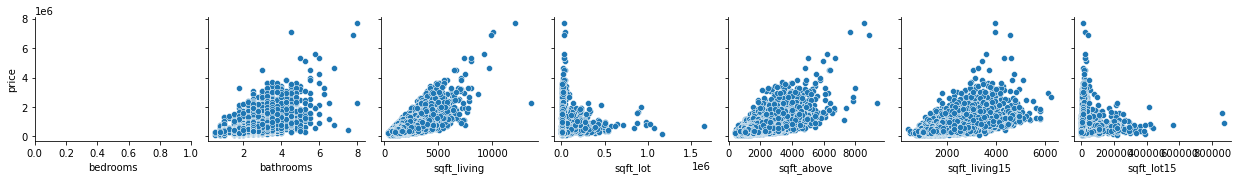

In [12]:
#vis of clean_df 
# pair plot vis
sns.pairplot(main_df, x_vars = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_living15',
                          'sqft_lot15'], y_vars = ['price'])
plt.show()

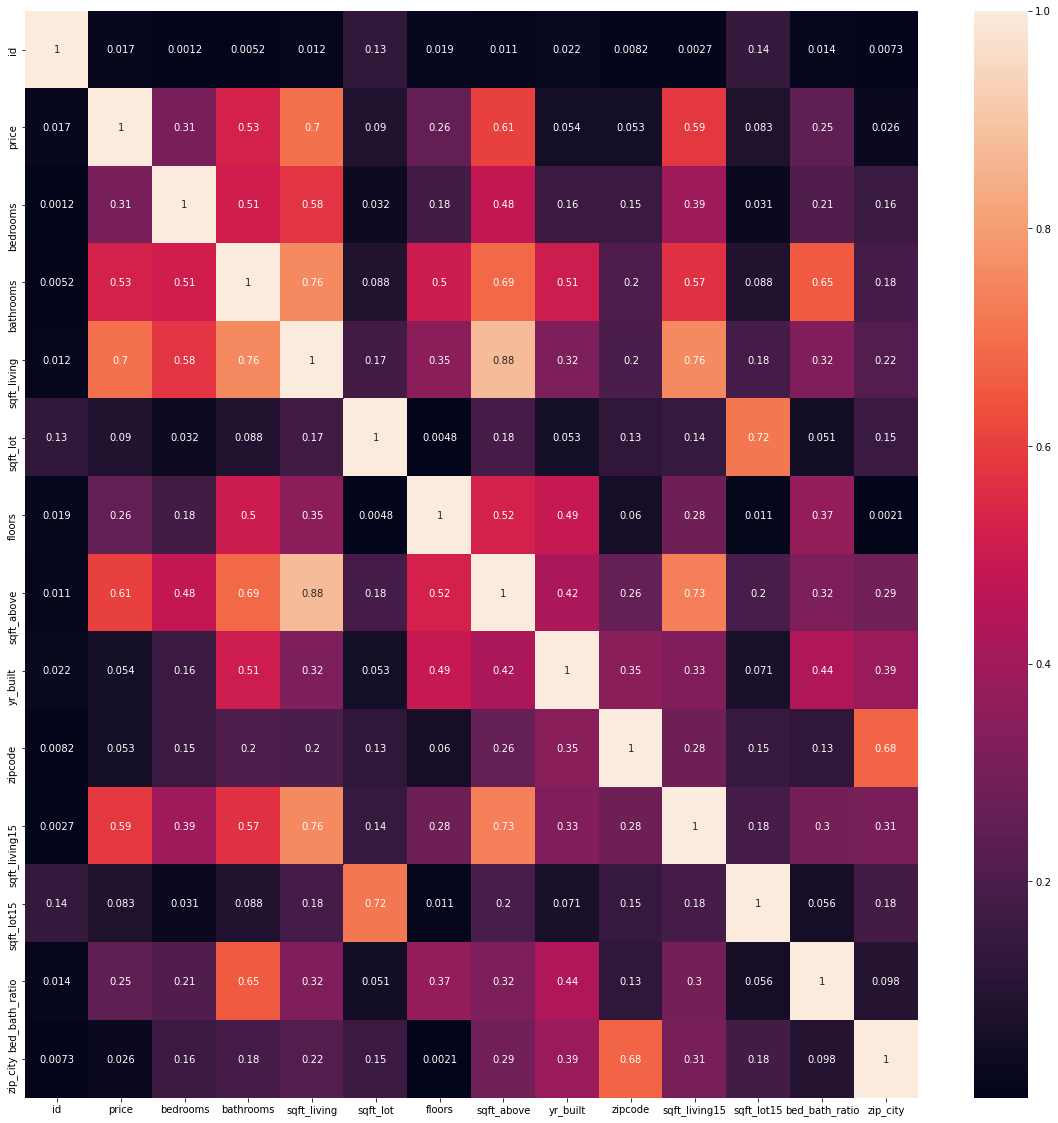

In [13]:
#vis of clean_df
plt.figure(figsize=(20,20))
sns.heatmap(df.corr().abs(), annot=True)
plt.show()

In [14]:
#add the no_out data back into the full clean dataframe 

not_out = main_df.copy()

#drop the columns that we have cleaned for outliers 
not_out = not_out.drop(columns= ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_above', 'sqft_living15', 'sqft_lot15', 'grade_num', 'bed_bath_ratio','mean_price'], axis=1)

#add the outliers & no-outlier data frames together so that we have all our columns again 

#we could have done a merge here (left right or inner)
clean_df = pd.concat([no_out, not_out], axis=1)

#drop the null values (for the columns that we did not do the outlier math on )
clean_df = clean_df.dropna()

#check to make sure that we have all our columns with the same amount of data
clean_df.info()

#store our cleaned data as a csv file for future use
clean_df.to_csv('clean_df.csv')


<class 'pandas.core.frame.DataFrame'>
Int64Index: 19479 entries, 0 to 21596
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   price           19479 non-null  float64
 1   bedrooms        19479 non-null  float64
 2   bathrooms       19479 non-null  float64
 3   sqft_living     19479 non-null  float64
 4   sqft_lot        19479 non-null  float64
 5   floors          19479 non-null  float64
 6   sqft_above      19479 non-null  float64
 7   sqft_living15   19479 non-null  float64
 8   sqft_lot15      19479 non-null  float64
 9   grade_num       19479 non-null  float64
 10  bed_bath_ratio  19479 non-null  float64
 11  mean_price      19479 non-null  float64
 12  id              19479 non-null  int64  
 13  zip_city        19479 non-null  int64  
 14  Waterfront      19479 non-null  uint8  
dtypes: float64(12), int64(2), uint8(1)
memory usage: 2.2 MB


In [15]:
# let's scale the data 
clean_df = pd.read_csv('clean_df.csv')

clean_df = clean_df.drop(columns = ['Unnamed: 0'])


# Instantiate a new scaler
scaler = StandardScaler()

# scaling for STD 
scaler.fit(clean_df)


#Apply the scale to all the data 
scaled_df = scaler.transform(clean_df)


scaled_df = pd.DataFrame(scaled_df,
                              columns=clean_df.columns,
                              index=clean_df.index)
scaled_df.head()




,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_living15,sqft_lot15,grade_num,bed_bath_ratio,mean_price,id,zip_city,Waterfront
0,-1.11572,-0.35178,-1.55982,-1.06182,-0.38158,-0.87574,-0.73923,-0.97564,-0.42036,-0.53006,2.24346,0.00000,0.85470,1.39436,-0.05696
1,0.20606,-0.35178,0.28724,0.85057,-0.22479,0.97252,0.73756,-0.37210,-0.14983,-0.53006,-0.70765,0.00000,0.60609,1.39436,-0.05696
2,-1.29093,-1.52070,-1.55982,-1.62591,0.04682,-0.87574,-1.35083,1.40403,-0.09230,-1.53621,0.47280,0.00000,0.33406,-0.71718,-0.05696
3,0.48204,0.81715,1.39548,0.01132,-0.44559,-0.87574,-0.93315,-0.94115,-0.50876,-0.53006,-0.70765,0.00000,-0.75892,1.39436,-0.05696
4,0.08897,-0.35178,-0.08217,-0.37391,-0.14227,-0.87574,0.00662,-0.18242,-0.16833,0.47608,-0.41254,0.00000,-0.94412,-0.71718,-0.05696


In [16]:
# lets look at some corrs 
potential_corrs = scaled_df.corr()['price'].map(abs).sort_values(ascending=False)
potential_corrs

price            1.00000
grade_num        0.61383
sqft_living      0.60783
sqft_living15    0.53187
sqft_above       0.48465
bathrooms        0.43632
bedrooms         0.30181
floors           0.24139
bed_bath_ratio   0.23746
Waterfront       0.10886
zip_city         0.08935
sqft_lot15       0.07954
sqft_lot         0.07637
id               0.00946
mean_price           nan
Name: price, dtype: float64


 # Baseline Model: Mean Price
 




In [17]:
import numpy as np
from sklearn.dummy import DummyRegressor

dummymodel = DummyRegressor(strategy = 'mean')

X = scaled_df.drop(labels = ['grade_num', 'price'], axis=1)
y = scaled_df.price

print(dummymodel.fit(X,y))

print(dummymodel.score(X,y))

y_pred = dummymodel.predict(X)

print(y_pred)

print(y.mean)

print(y - y_pred)

#the 0.0 is the R-squared --> the mean pricee of the home does not explain any variation
#preds are all the same value bc we use the mean 

# the last is our rediuals; how wrong are we (obseerved - expected); off by 270k for the first observation; bc we are preedicting

# this is what we are talking about when we say root mean squared error --> sklearn.metrics see link from jelly 

# we want these metrics to be "bad" the only way to go is up! 

DummyRegressor()
0.0
[-2.04273285e-17 -2.04273285e-17 -2.04273285e-17 ... -2.04273285e-17
 -2.04273285e-17 -2.04273285e-17]
<bound method Series.mean of 0       -1.11572
1        0.20606
2       -1.29093
3        0.48204
4        0.08897
          ...   
19474   -0.53825
19475   -0.37099
19476   -0.36221
19477   -0.37099
19478   -0.68461
Name: price, Length: 19479, dtype: float64>
0       -1.11572
1        0.20606
2       -1.29093
3        0.48204
4        0.08897
          ...   
19474   -0.53825
19475   -0.37099
19476   -0.36221
19477   -0.37099
19478   -0.68461
Name: price, Length: 19479, dtype: float64


# Lets start running some regressions  now (after cleaning)

In [60]:
#bi model with constant: price & grade_num 


X = scaled_df['grade_num']
X = sm.add_constant(X)
y = scaled_df['price']

model1 = ols('price ~ grade_num', data=scaled_df)
model1_results = model1.fit()
print(model1_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.377
Model:                            OLS   Adj. R-squared:                  0.377
Method:                 Least Squares   F-statistic:                 1.178e+04
Date:                Wed, 14 Sep 2022   Prob (F-statistic):               0.00
Time:                        09:38:52   Log-Likelihood:                -23034.
No. Observations:               19479   AIC:                         4.607e+04
Df Residuals:                   19477   BIC:                         4.609e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -3.89e-18      0.006  -6.88e-16      1.0

In [59]:
#bi model with constant: price & sqft

X = scaled_df['sqft_living']
X = sm.add_constant(X)
y = scaled_df['price']

model2 = ols('price ~ sqft_living', data=scaled_df)
model2_results = model2.fit()
print(model2_results.summary())

#why did we choose swft_living; corr & how it impacts the firm 
#talk about r-sqaured & p-value --> going to add another variable bc...
#for each one unit increase in X, Y .....


#intercept: not a lot of data fro 0 swft of living, by the time it gets to 0 sqft, its in the negatives --> the coef is almost at 0 

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.369
Model:                            OLS   Adj. R-squared:                  0.369
Method:                 Least Squares   F-statistic:                 1.141e+04
Date:                Wed, 14 Sep 2022   Prob (F-statistic):               0.00
Time:                        09:36:49   Log-Likelihood:                -23148.
No. Observations:               19479   AIC:                         4.630e+04
Df Residuals:                   19477   BIC:                         4.632e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    -3.89e-18      0.006  -6.84e-16      

In [61]:
# bi model: price & sqft_living15
X = scaled_df['sqft_living15']
X = sm.add_constant(X)
y = scaled_df['price']

model3 = ols('price ~ sqft_living15', data=scaled_df)
model3_results = model3.fit()
print(model3_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.283
Model:                            OLS   Adj. R-squared:                  0.283
Method:                 Least Squares   F-statistic:                     7683.
Date:                Wed, 14 Sep 2022   Prob (F-statistic):               0.00
Time:                        09:40:28   Log-Likelihood:                -24401.
No. Observations:               19479   AIC:                         4.881e+04
Df Residuals:                   19477   BIC:                         4.882e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      -3.89e-18      0.006  -6.41e-16

In [62]:
#bi model: price & sqft_above
X = scaled_df['sqft_above']
X = sm.add_constant(X)
y = scaled_df['price']

model4 = ols('price ~ sqft_above', data=scaled_df)
model4_results = model4.fit()
print(model4_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.235
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     5979.
Date:                Wed, 14 Sep 2022   Prob (F-statistic):               0.00
Time:                        09:41:48   Log-Likelihood:                -25032.
No. Observations:               19479   AIC:                         5.007e+04
Df Residuals:                   19477   BIC:                         5.008e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -3.89e-18      0.006  -6.21e-16      1.0

In [63]:
# bi model: price & bathrooms 
X = scaled_df['bathrooms']
X = sm.add_constant(X)
y = scaled_df['price']

model5 = ols('price ~ bathrooms', data=scaled_df)
model5_results = model5.fit()
print(model5_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.190
Model:                            OLS   Adj. R-squared:                  0.190
Method:                 Least Squares   F-statistic:                     4580.
Date:                Wed, 14 Sep 2022   Prob (F-statistic):               0.00
Time:                        09:42:39   Log-Likelihood:                -25583.
No. Observations:               19479   AIC:                         5.117e+04
Df Residuals:                   19477   BIC:                         5.119e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -3.89e-18      0.006  -6.03e-16      1.0

In [58]:
#this has no constant

#note: add constant 
#

#why did we choose swft_living; corr & how it impacts the firm 




#simple_formula = 'price ~ sqft_living'

#simple_model = ols(formula=simple_formula, data=scaled_df).fit()

#print(simple_model.summary())

#talk about r-sqaured & p-value --> going to add another variable bc...
#for each one unit increase in X, Y .....


#intercept: not a lot of data fro 0 swft of living, by the time it gets to 0 sqft, its in the negatives --> the coef is almost at 0 

# Questions 
- Standard Scalar?
    - all numeric data in terms of standard deviations --> used when one has metrics on very diff scales ** somethhing we might want to explore ** for multi --> look at diff between scale and unscaled --> when int it is in terms of STD, for every one STD increase in X .. Y does this --> calc what that STD is 
        - in terms of sqft, what does 1 STD look like (.describe will tell you what mean, its the relationships between mean & std) bc we don't wanna talk about STDs to clients; and we are data scientists, we talk in terms of proximity :give or tak: ! 
- Get rid of outliers? see above
- "divising a model that can help predict purchase price based on the attributes of the home --> so firms can better prepare their client for the pre-approval process" 
- ask about interpretations of sqft coef. 
- ask about int. of dummy model 
- ask about zip code int (maybe we talk about this for future insights) 


overall notes: 
- give reasons for everything! 
- meet the checklist! 
- don't delete code :-) 

# Playing around with Multi Regressions 

In [19]:
potential_corrs = scaled_df.corr()['price'].map(abs).sort_values(ascending=False)
potential_corrs

price            1.00000
grade_num        0.61383
sqft_living      0.60783
sqft_living15    0.53187
sqft_above       0.48465
bathrooms        0.43632
bedrooms         0.30181
floors           0.24139
bed_bath_ratio   0.23746
Waterfront       0.10886
zip_city         0.08935
sqft_lot15       0.07954
sqft_lot         0.07637
id               0.00946
mean_price           nan
Name: price, dtype: float64

In [71]:
#mulit: price & grade_num + sqft_living 
X = scaled_df[['grade_num','sqft_living']]
X = sm.add_constant(X)
y = scaled_df['price']

model6 = ols('price ~ grade_num + sqft_living', data=scaled_df)
model6_results = model6.fit()
print(model6_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.441
Model:                            OLS   Adj. R-squared:                  0.441
Method:                 Least Squares   F-statistic:                     7670.
Date:                Wed, 14 Sep 2022   Prob (F-statistic):               0.00
Time:                        09:53:20   Log-Likelihood:                -21982.
No. Observations:               19479   AIC:                         4.397e+04
Df Residuals:                   19476   BIC:                         4.399e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    -3.89e-18      0.005  -7.26e-16      

In [68]:
# mulit: price & grade + sqft_living + waterfront + zip_city (chose those last 2 bc of mulitcoli)
X = scaled_df[['grade_num','sqft_living', 'Waterfront', 'zip_city']]
X = sm.add_constant(X)
y = scaled_df['price']

model7 = ols('price ~ grade_num + sqft_living + Waterfront + zip_city', data=scaled_df)
model7_results = model7.fit()
print(model7_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.502
Model:                            OLS   Adj. R-squared:                  0.502
Method:                 Least Squares   F-statistic:                     4902.
Date:                Wed, 14 Sep 2022   Prob (F-statistic):               0.00
Time:                        09:51:14   Log-Likelihood:                -20855.
No. Observations:               19479   AIC:                         4.172e+04
Df Residuals:                   19474   BIC:                         4.176e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -1.863e-17      0.005  -3.68e-15      

In [69]:





#regression of price on sqft livingg & grade_num 

#grade_formula = 'price ~ sqft_living + grade_num'

#grade_model = ols(formula=grade_formula, data=clean_df).fit()

#grade_model.summary()

#we can see our R-sqaured increased by 0.072 





#X = scaled_df['sqft_living']
#X = sm.add_constant(X)
#y = scaled_df['price']

#model = ols('price ~ sqft_living', data=scaled_df)
#model_results = model.fit()
#print(model_results.summary())


In [73]:
X = scaled_df[['grade_num','sqft_living', 'sqft_living15']]
X = sm.add_constant(X)
y = scaled_df['price']

model8 = ols('price ~ grade_num + sqft_living + sqft_living15', data=scaled_df)
model8_results = model8.fit()
print(model8_results.summary())

#no sign of mutilcoli when you include both sqft_living & sqft_living15! 

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.444
Model:                            OLS   Adj. R-squared:                  0.444
Method:                 Least Squares   F-statistic:                     5176.
Date:                Wed, 14 Sep 2022   Prob (F-statistic):               0.00
Time:                        09:53:53   Log-Likelihood:                -21929.
No. Observations:               19479   AIC:                         4.387e+04
Df Residuals:                   19475   BIC:                         4.390e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.863e-17      0.005  -3.49e-15

In [75]:
#HIGHESST R-SQUARED SO FAR!
# mulit: price & grade + sqft_living + waterfront + zip_city + sqft_living15
X = scaled_df[['grade_num','sqft_living', 'Waterfront', 'zip_city', 'sqft_living15']]
X = sm.add_constant(X)
y = scaled_df['price']

model9 = ols('price ~ grade_num + sqft_living + Waterfront + zip_city + sqft_living15', data=scaled_df)
model9_results = model9.fit()
print(model9_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.514
Model:                            OLS   Adj. R-squared:                  0.514
Method:                 Least Squares   F-statistic:                     4123.
Date:                Wed, 14 Sep 2022   Prob (F-statistic):               0.00
Time:                        09:55:33   Log-Likelihood:                -20607.
No. Observations:               19479   AIC:                         4.123e+04
Df Residuals:                   19473   BIC:                         4.127e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.863e-17      0.005  -3.73e-15

In [76]:

# mulit: price & grade + sqft_living + waterfront + zip_city + sqft_living15 + bed_bath_ratio
X = scaled_df[['grade_num','sqft_living', 'Waterfront', 'zip_city', 'sqft_living15', 'bed_bath_ratio']]
X = sm.add_constant(X)
y = scaled_df['price']

model10 = ols('price ~ grade_num + sqft_living + Waterfront + zip_city + sqft_living15 + bed_bath_ratio', data=scaled_df)
model10_results = model10.fit()
print(model10_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.515
Model:                            OLS   Adj. R-squared:                  0.514
Method:                 Least Squares   F-statistic:                     3440.
Date:                Wed, 14 Sep 2022   Prob (F-statistic):               0.00
Time:                        09:57:42   Log-Likelihood:                -20601.
No. Observations:               19479   AIC:                         4.122e+04
Df Residuals:                   19472   BIC:                         4.127e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -1.863e-17      0.005  -3.73e

In [80]:
# mulit: price & grade + sqft_living + waterfront + zip_city + sqft_living15 + bed_bath_ratio
X = scaled_df[['grade_num','sqft_living', 'Waterfront', 'zip_city', 'sqft_living15', 'bed_bath_ratio', 'sqft_lot']]
X = sm.add_constant(X)
y = scaled_df['price']

model11 = ols('price ~ grade_num + sqft_living + Waterfront + zip_city + sqft_living15 + bed_bath_ratio + sqft_lot', data=scaled_df)
model11_results = model11.fit()
print(model11_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.515
Model:                            OLS   Adj. R-squared:                  0.514
Method:                 Least Squares   F-statistic:                     2950.
Date:                Wed, 14 Sep 2022   Prob (F-statistic):               0.00
Time:                        09:59:48   Log-Likelihood:                -20599.
No. Observations:               19479   AIC:                         4.121e+04
Df Residuals:                   19471   BIC:                         4.128e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -1.863e-17      0.005  -3.73e

In [81]:
#trying sqft_lot15 bc the regular sqft_lot was not stat sig 
# mulit: price & grade + sqft_living + waterfront + zip_city + sqft_living15 + bed_bath_ratio + sqft_lot15
X = scaled_df[['grade_num','sqft_living', 'Waterfront', 'zip_city', 'sqft_living15', 'bed_bath_ratio', 'sqft_lot15']]
X = sm.add_constant(X)
y = scaled_df['price']

model12 = ols('price ~ grade_num + sqft_living + Waterfront + zip_city + sqft_living15 + bed_bath_ratio + sqft_lot15', data=scaled_df)
model12_results = model12.fit()
print(model12_results.summary())

#same R-sq as model10, but model 10 has less predictors 

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.515
Model:                            OLS   Adj. R-squared:                  0.515
Method:                 Least Squares   F-statistic:                     2954.
Date:                Wed, 14 Sep 2022   Prob (F-statistic):               0.00
Time:                        10:01:34   Log-Likelihood:                -20591.
No. Observations:               19479   AIC:                         4.120e+04
Df Residuals:                   19471   BIC:                         4.126e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -1.863e-17      0.005  -3.73e

In [82]:
#mulit: same as model10 but using bedrooms & bathrooms instead of the ratio 

X = scaled_df[['grade_num','sqft_living', 'Waterfront', 'zip_city', 'sqft_living15', 'bedrooms', 'bathrooms']]
X = sm.add_constant(X)
y = scaled_df['price']

model13 = ols('price ~ grade_num + sqft_living + Waterfront + zip_city + sqft_living15 + bedrooms + bathrooms', data=scaled_df)
model13_results = model13.fit()
print(model13_results.summary())

#all are stat sig, r-sqaured is highest but it seems that as the number beds and baths goes up the price goes down which doesnt make sense with sqft living 

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.517
Model:                            OLS   Adj. R-squared:                  0.517
Method:                 Least Squares   F-statistic:                     2977.
Date:                Wed, 14 Sep 2022   Prob (F-statistic):               0.00
Time:                        10:05:34   Log-Likelihood:                -20552.
No. Observations:               19479   AIC:                         4.112e+04
Df Residuals:                   19471   BIC:                         4.118e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.863e-17      0.005  -3.74e-15

In [84]:
#mulit: same as model13 but dropping sqft_living bc bedrooms & bathrooms might be capturing that as well

X = scaled_df[['grade_num','sqft_living', 'Waterfront', 'zip_city', 'sqft_living15', 'bedrooms', 'bathrooms']]
X = sm.add_constant(X)
y = scaled_df['price']

model14 = ols('price ~ grade_num + Waterfront + zip_city + sqft_living15 + bedrooms + bathrooms', data=scaled_df)
model14_results = model14.fit()
print(model14_results.summary())

#r-sqaured goes down, beds and baths are sig but their coef are very small

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.482
Model:                            OLS   Adj. R-squared:                  0.482
Method:                 Least Squares   F-statistic:                     3018.
Date:                Wed, 14 Sep 2022   Prob (F-statistic):               0.00
Time:                        10:08:14   Log-Likelihood:                -21236.
No. Observations:               19479   AIC:                         4.249e+04
Df Residuals:                   19472   BIC:                         4.254e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.863e-17      0.005  -3.61e-15

In [85]:
#same as model 10 but including floors 
# mulit: price & grade + sqft_living + waterfront + zip_city + sqft_living15 + bed_bath_ratio + floors
X = scaled_df[['grade_num','sqft_living', 'Waterfront', 'zip_city', 'sqft_living15', 'bed_bath_ratio', 'floors']]
X = sm.add_constant(X)
y = scaled_df['price']

model15 = ols('price ~ grade_num + sqft_living + Waterfront + zip_city + sqft_living15 + bed_bath_ratio + floors', data=scaled_df)
model15_results = model15.fit()
print(model15_results.summary())

#NOW THIS HAS THE BEST R_SQAURED
#but includingg floors made bed_bath_ratio not stat sig 

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.517
Method:                 Least Squares   F-statistic:                     2984.
Date:                Wed, 14 Sep 2022   Prob (F-statistic):               0.00
Time:                        10:10:10   Log-Likelihood:                -20541.
No. Observations:               19479   AIC:                         4.110e+04
Df Residuals:                   19471   BIC:                         4.116e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -1.863e-17      0.005  -3.74e

In [86]:
#model 16
#same as model 15 but dropping bed/bath/ratio in favor of floors 
# mulit: price & grade + sqft_living + waterfront + zip_city + sqft_living15 + floors
X = scaled_df[['grade_num','sqft_living', 'Waterfront', 'zip_city', 'sqft_living15', 'floors']]
X = sm.add_constant(X)
y = scaled_df['price']

model16 = ols('price ~ grade_num + sqft_living + Waterfront + zip_city + sqft_living15 + floors', data=scaled_df)
model16_results = model16.fit()
print(model16_results.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.517
Method:                 Least Squares   F-statistic:                     3481.
Date:                Wed, 14 Sep 2022   Prob (F-statistic):               0.00
Time:                        10:11:48   Log-Likelihood:                -20541.
No. Observations:               19479   AIC:                         4.110e+04
Df Residuals:                   19472   BIC:                         4.115e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.863e-17      0.005  -3.74e-15

In [87]:
#model 17 

# same as model 16 but getting rid of sqft_livinng15 bc floors was negative and we want to see if one of the variables may be forcing that direction 
 
# mulit: price & grade + sqft_living + waterfront + zip_city +  floors
X = scaled_df[['grade_num','sqft_living', 'Waterfront', 'zip_city', 'floors']]
X = sm.add_constant(X)
y = scaled_df['price']

model17 = ols('price ~ grade_num + sqft_living + Waterfront + zip_city + floors', data=scaled_df)
model17_results = model17.fit()
print(model17_results.summary())

#our r-sqaured goes down by .012, and floors is still negative; further investigation is needed 

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.506
Model:                            OLS   Adj. R-squared:                  0.506
Method:                 Least Squares   F-statistic:                     3989.
Date:                Wed, 14 Sep 2022   Prob (F-statistic):               0.00
Time:                        10:14:22   Log-Likelihood:                -20772.
No. Observations:               19479   AIC:                         4.156e+04
Df Residuals:                   19473   BIC:                         4.160e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -1.863e-17      0.005   -3.7e-15      

In [88]:
#model 18

# same as model 16 but getting rid of sqft_living bc floors was negative and we want to see if one of the variables may be forcing that direction 
 
# mulit: price & grade + sqft_living15 + waterfront + zip_city +  floors
X = scaled_df[['grade_num','sqft_living15', 'Waterfront', 'zip_city', 'floors']]
X = sm.add_constant(X)
y = scaled_df['price']

model18 = ols('price ~ grade_num + sqft_living15 + Waterfront + zip_city + floors', data=scaled_df)
model18_results = model18.fit()
print(model18_results.summary())

#Rr-sqaured goes down from model 16 by .04 and floors is still negative --> further investigation is needed 

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.478
Model:                            OLS   Adj. R-squared:                  0.478
Method:                 Least Squares   F-statistic:                     3568.
Date:                Wed, 14 Sep 2022   Prob (F-statistic):               0.00
Time:                        10:15:58   Log-Likelihood:                -21305.
No. Observations:               19479   AIC:                         4.262e+04
Df Residuals:                   19473   BIC:                         4.267e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.863e-17      0.005   -3.6e-15

In [89]:
#model 19

# same as model 16 but getting rid of grade_number bc floors was negative and we want to see if one of the variables may be forcing that direction 
 
# mulit: price & + sqft_living15 + waterfront + zip_city +  floors
X = scaled_df[['sqft_living15', 'sqft_living', 'Waterfront', 'zip_city', 'floors']]
X = sm.add_constant(X)
y = scaled_df['price']

model19 = ols('price ~  sqft_living15 + sqft_living + Waterfront + zip_city + floors', data=scaled_df)
model19_results = model19.fit()
print(model19_results.summary())

#r-sqaured is still lower than modeel 16, altho floors is postive now (so maybe grade number does contribute)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.467
Model:                            OLS   Adj. R-squared:                  0.466
Method:                 Least Squares   F-statistic:                     3406.
Date:                Wed, 14 Sep 2022   Prob (F-statistic):               0.00
Time:                        10:18:43   Log-Likelihood:                -21519.
No. Observations:               19479   AIC:                         4.305e+04
Df Residuals:                   19473   BIC:                         4.310e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.863e-17      0.005  -3.56e-15

In [91]:
#model 20

# same as model 16 but getting rid of zip_city bc floors was negative and we want to see if one of the variables may be forcing that direction 
 
# mulit: price & + sqft_living15 + waterfront + zip_city +  floors
X = scaled_df[[ 'grade_num','sqft_living15', 'sqft_living', 'Waterfront','floors']]
X = sm.add_constant(X)
y = scaled_df['price']

model20 = ols('price ~  grade_num + sqft_living15 + sqft_living + Waterfront + floors', data=scaled_df)
model20_results = model20.fit()
print(model20_results.summary())

#floors is negative, we can guess that grade_num is capturing something with floors, but this is not the best moodel we have 

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.455
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     3246.
Date:                Wed, 14 Sep 2022   Prob (F-statistic):               0.00
Time:                        10:21:58   Log-Likelihood:                -21736.
No. Observations:               19479   AIC:                         4.348e+04
Df Residuals:                   19473   BIC:                         4.353e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.863e-17      0.005  -3.52e-15

In [93]:
#model 21
#wanna look at the interaction between grade and floors 

# mulit: price & + num_grade +  floors
X = scaled_df[['grade_num', 'floors']]
X = sm.add_constant(X)
y = scaled_df['price']

model21 = ols('price ~  grade_num + floors', data=scaled_df)
model21_results = model21.fit()
print(model21_results.summary())

#floors is still negative --> further investigation is needed 

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.378
Model:                            OLS   Adj. R-squared:                  0.378
Method:                 Least Squares   F-statistic:                     5928.
Date:                Wed, 14 Sep 2022   Prob (F-statistic):               0.00
Time:                        10:24:29   Log-Likelihood:                -23009.
No. Observations:               19479   AIC:                         4.602e+04
Df Residuals:                   19476   BIC:                         4.605e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -3.89e-18      0.006  -6.88e-16      1.0

In [94]:
#model 22
#wanna look at the interaction between price and floors 

# mulit: price & floors
X = scaled_df[['floors']]
X = sm.add_constant(X)
y = scaled_df['price']

model22 = ols('price ~ floors', data=scaled_df)
model22_results = model22.fit()
print(model22_results.summary())

#ok looks like its not negativ anymore!

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.058
Model:                            OLS   Adj. R-squared:                  0.058
Method:                 Least Squares   F-statistic:                     1205.
Date:                Wed, 14 Sep 2022   Prob (F-statistic):          2.91e-256
Time:                        10:25:24   Log-Likelihood:                -27055.
No. Observations:               19479   AIC:                         5.411e+04
Df Residuals:                   19477   BIC:                         5.413e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -3.89e-18      0.007  -5.59e-16      1.0

In [95]:
#model 23: the same as model 16 but adding in sqft_above 
 

# mulit: price & grade_num + swft_liv + water + zip + sqftliv15 + sqftabove + floors 
X = scaled_df[['grade_num', 'sqft_living', 'Waterfront', 'sqft_living15', 'sqft_above', 'floors', 'zip_city']]
X = sm.add_constant(X)
y = scaled_df['price']

model23 = ols('price ~  grade_num + sqft_living + Waterfront + sqft_living15 + sqft_above + floors + zip_city', data=scaled_df)
model23_results = model23.fit()
print(model23_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.520
Model:                            OLS   Adj. R-squared:                  0.520
Method:                 Least Squares   F-statistic:                     3016.
Date:                Wed, 14 Sep 2022   Prob (F-statistic):               0.00
Time:                        10:28:47   Log-Likelihood:                -20487.
No. Observations:               19479   AIC:                         4.099e+04
Df Residuals:                   19471   BIC:                         4.105e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.863e-17      0.005  -3.75e-15

In [96]:
#model 24 
# same as model 23 but dropping floors 
# mulit: price & grade_num + swft_liv + water + zip + sqftliv15 + sqftabove 
X = scaled_df[['grade_num', 'sqft_living', 'Waterfront', 'sqft_living15', 'sqft_above', 'zip_city']]
X = sm.add_constant(X)
y = scaled_df['price']

model24 = ols('price ~  grade_num + sqft_living + Waterfront + sqft_living15 + sqft_above + zip_city', data=scaled_df)
model24_results = model24.fit()
print(model24_results.summary())

#best R-sqaured so far!!

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.520
Model:                            OLS   Adj. R-squared:                  0.519
Method:                 Least Squares   F-statistic:                     3510.
Date:                Wed, 14 Sep 2022   Prob (F-statistic):               0.00
Time:                        10:30:43   Log-Likelihood:                -20499.
No. Observations:               19479   AIC:                         4.101e+04
Df Residuals:                   19472   BIC:                         4.107e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.863e-17      0.005  -3.75e-15

In [99]:
#model 25
# same as model 23 but dropping zipcode & floorrs bc sqftabove might be capturing the same thing 
# mulit: price & grade_num + swft_liv + water + sqftliv15 + sqftabove + floors
X = scaled_df[['grade_num', 'sqft_living', 'Waterfront', 'sqft_living15', 'sqft_above']]
X = sm.add_constant(X)
y = scaled_df['price']

model25 = ols('price ~  grade_num + sqft_living + Waterfront + sqft_living15 + sqft_above ', data=scaled_df)
model25_results = model25.fit()
print(model25_results.summary())

#not as good as compared to 24 sqft_above and floors are related 

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.468
Model:                            OLS   Adj. R-squared:                  0.468
Method:                 Least Squares   F-statistic:                     3428.
Date:                Wed, 14 Sep 2022   Prob (F-statistic):               0.00
Time:                        10:36:13   Log-Likelihood:                -21491.
No. Observations:               19479   AIC:                         4.299e+04
Df Residuals:                   19473   BIC:                         4.304e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.863e-17      0.005  -3.57e-15

In [103]:
#regression with bed and bath ratio, number rgrade & sqft 

#ratio_formula = 'price ~ sqft_living + grade_num + bed_bath_ratio'

#ratio_model = ols(formula=ratio_formula, data=scaled_df).fit()

#ratio_model.summary()

#r-squared didnt change much, looks like there might be some mulitcolo

In [102]:
#model 26 
#droppng garde, keeping swft above, dropping floors
# mulit: price &  swft_liv + water + zip + sqftliv15 + sqftabove 
X = scaled_df[['sqft_living', 'Waterfront', 'sqft_living15', 'sqft_above', 'zip_city']]
X = sm.add_constant(X)
y = scaled_df['price']

model26 = ols('price ~  sqft_living + Waterfront + sqft_living15 + sqft_above + zip_city', data=scaled_df)
model26_results = model26.fit()
print(model26_results.summary())

#not as good as compared to model 24 bc the r-squared is lower

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.466
Model:                            OLS   Adj. R-squared:                  0.466
Method:                 Least Squares   F-statistic:                     3405.
Date:                Wed, 14 Sep 2022   Prob (F-statistic):               0.00
Time:                        10:38:32   Log-Likelihood:                -21520.
No. Observations:               19479   AIC:                         4.305e+04
Df Residuals:                   19473   BIC:                         4.310e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.863e-17      0.005  -3.56e-15

In [21]:
ratio_formula_no_living = 'price ~ grade_num + bed_bath_ratio'

ratio_model_no_living = ols(formula=ratio_formula_no_living, data=clean_df).fit()

ratio_model_no_living.summary()

#r-sqaured went down, but little to no multicoli

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.377
Model:                            OLS   Adj. R-squared:                  0.377
Method:                 Least Squares   F-statistic:                     5888.
Date:                Wed, 14 Sep 2022   Prob (F-statistic):               0.00
Time:                        08:38:36   Log-Likelihood:            -2.6428e+05
No. Observations:               19479   AIC:                         5.286e+05
Df Residuals:                   19476   BIC:                         5.286e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -6.253e+05   1.36e+04    -45.996      0.000   -6.52e+05   -5.99e+05
grade_num       1.478e+05   1477.545    100.065      0.000    1.45e+05    1.51e+05
bed_bath_ratio   685.2767   2600.256      0.264      0.792   -4411.448    5782.001
==============================================================================
Omnibus:                     4165.274   Durbin-Watson:                   1.952
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10212.987
Skew:                           1.185   Prob(JB):                         0.00
Kurtosis:                       5.640   Cond. No.                         79.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
ratio_formula_no_living = 'price ~ grade_num + bed_bath_ratio'

ratio_model_no_living = ols(formula=ratio_formula_no_living, data=scaled_df).fit()

ratio_model_no_living.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.377
Model:                            OLS   Adj. R-squared:                  0.377
Method:                 Least Squares   F-statistic:                     5888.
Date:                Tue, 13 Sep 2022   Prob (F-statistic):               0.00
Time:                        15:58:47   Log-Likelihood:                -23034.
No. Observations:               19479   AIC:                         4.607e+04
Df Residuals:                   19476   BIC:                         4.610e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       6.505e-18      0.006   1.15e-15      1.000      -0.011       0.011
grade_num          0.6145      0.006    100.065      0.000       0.602       0.626
bed_bath_ratio     0.0016      0.006      0.264      0.792      -0.010       0.014
==============================================================================
Omnibus:                     4165.274   Durbin-Watson:                   1.952
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10212.987
Skew:                           1.185   Prob(JB):                         0.00
Kurtosis:                       5.640   Cond. No.                         1.51
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
potential_corrs = scaled_df.corr()['price'].map(abs).sort_values(ascending=False)
potential_corrs

price            1.00000
grade_num        0.61383
sqft_living      0.60783
sqft_living15    0.53187
sqft_above       0.48465
bathrooms        0.43632
bedrooms         0.30181
floors           0.24139
bed_bath_ratio   0.23746
Waterfront       0.10886
zip_city         0.08935
sqft_lot15       0.07954
sqft_lot         0.07637
id               0.00946
mean_price           nan
Name: price, dtype: float64

In [32]:
water_living_formula = 'price ~ Waterfront + sqft_living'

water_living_formula_model = ols(formula=water_living_formula , data=scaled_df).fit()

water_living_formula_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.379
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     5951.
Date:                Tue, 13 Sep 2022   Prob (F-statistic):               0.00
Time:                        15:58:56   Log-Likelihood:                -22994.
No. Observations:               19479   AIC:                         4.599e+04
Df Residuals:                   19476   BIC:                         4.602e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    6.505e-18      0.006   1.15e-15      1.000      -0.011       0.011
Waterfront      0.0993      0.006     17.589      0.000       0.088       0.110
sqft_living     0.6063      0.006    107.381      0.000       0.595       0.617
==============================================================================
Omnibus:                     3447.816   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7647.053
Skew:                           1.029   Prob(JB):                         0.00
Kurtosis:                       5.277   Cond. No.                         1.02
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:

water_living_formula = 'price ~ Waterfront + sqft_living +'

water_living_formula_model = ols(formula=water_living_formula , data=scaled_df).fit()

water_living_formula_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.379
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     5951.
Date:                Tue, 13 Sep 2022   Prob (F-statistic):               0.00
Time:                        15:59:19   Log-Likelihood:                -22994.
No. Observations:               19479   AIC:                         4.599e+04
Df Residuals:                   19476   BIC:                         4.602e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    6.505e-18      0.006   1.15e-15      1.000      -0.011       0.011
Waterfront      0.0993      0.006     17.589      0.000       0.088       0.110
sqft_living     0.6063      0.006    107.381      0.000       0.595       0.617
==============================================================================
Omnibus:                     3447.816   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7647.053
Skew:                           1.029   Prob(JB):                         0.00
Kurtosis:                       5.277   Cond. No.                         1.02
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
just_zip_formula = 'price ~ zip_city + sqft_lot'
just_zip_formula_model = ols(formula=just_zip_formula , data=scaled_df).fit()
just_zip_formula_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     156.8
Date:                Tue, 13 Sep 2022   Prob (F-statistic):           7.96e-36
Time:                        16:03:04   Log-Likelihood:                -27561.
No. Observations:               19479   AIC:                         5.513e+04
Df Residuals:                   19477   BIC:                         5.514e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6.505e-18      0.007   9.12e-16      1.000      -0.014       0.014
zip_city       0.0894      0.007     12.520      0.000       0.075       0.103
==============================================================================
Omnibus:                     4810.999   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11545.180
Skew:                           1.377   Prob(JB):                         0.00
Kurtosis:                       5.578   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Playing with Sklearn

In [19]:
scaled_df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_living15,sqft_lot15,grade_num,bed_bath_ratio,mean_price,id,zip_city,Waterfront
0,-1.11572,-0.35178,-1.55982,-1.06182,-0.38158,-0.87574,-0.73923,-0.97564,-0.42036,-0.53006,2.24346,0.00000,0.85470,1.39436,-0.05696
1,0.20606,-0.35178,0.28724,0.85057,-0.22479,0.97252,0.73756,-0.37210,-0.14983,-0.53006,-0.70765,0.00000,0.60609,1.39436,-0.05696
2,-1.29093,-1.52070,-1.55982,-1.62591,0.04682,-0.87574,-1.35083,1.40403,-0.09230,-1.53621,0.47280,0.00000,0.33406,-0.71718,-0.05696
3,0.48204,0.81715,1.39548,0.01132,-0.44559,-0.87574,-0.93315,-0.94115,-0.50876,-0.53006,-0.70765,0.00000,-0.75892,1.39436,-0.05696
4,0.08897,-0.35178,-0.08217,-0.37391,-0.14227,-0.87574,0.00662,-0.18242,-0.16833,0.47608,-0.41254,0.00000,-0.94412,-0.71718,-0.05696


In [20]:
clean_df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_living15,sqft_lot15,grade_num,bed_bath_ratio,mean_price,id,zip_city,Waterfront
0,221900.00000,3.00000,1.00000,1180.00000,5650.00000,1.00000,1180.00000,1340.00000,5650.00000,7.00000,3.00000,540296.57351,7129300520,1,0
1,538000.00000,3.00000,2.25000,2570.00000,7242.00000,2.00000,2170.00000,1690.00000,7639.00000,7.00000,1.33333,540296.57351,6414100192,1,0
2,180000.00000,2.00000,1.00000,770.00000,10000.00000,1.00000,770.00000,2720.00000,8062.00000,6.00000,2.00000,540296.57351,5631500400,0,0
3,604000.00000,4.00000,3.00000,1960.00000,5000.00000,1.00000,1050.00000,1360.00000,5000.00000,7.00000,1.33333,540296.57351,2487200875,1,0
4,510000.00000,3.00000,2.00000,1680.00000,8080.00000,1.00000,1680.00000,1800.00000,7503.00000,8.00000,1.50000,540296.57351,1954400510,0,0


In [25]:
learn_preds = clean_df.drop('price', axis =1)
learn_target = clean_df['price']

In [26]:
learn_scaled = (learn_preds - learn_preds.mean())/learn_preds.std(ddof=0)

In [27]:
ss = StandardScaler()

In [28]:
ss.fit(learn_preds)

StandardScaler()

In [30]:
learn_preds_st_scaled = ss.transform(learn_preds)
learn_preds_st_scaled

array([[-0.35177525, -1.55982454, -1.06182498, ...,  0.85469804,
         1.39435509, -0.05696268],
       [-0.35177525,  0.28723878,  0.85056933, ...,  0.60609138,
         1.39435509, -0.05696268],
       [-1.52069882, -1.55982454, -1.62591252, ...,  0.33405639,
        -0.71717743, -0.05696268],
       ...,
       [-1.52069882, -1.9292372 , -1.2819567 , ..., -1.0939714 ,
         1.39435509, -0.05696268],
       [-0.35177525,  0.65665145, -0.48397922, ..., -1.52221635,
        -0.71717743, -0.05696268],
       [-1.52069882, -1.9292372 , -1.2819567 , ..., -1.0939714 ,
         1.39435509, -0.05696268]])

In [35]:
learn_preds_st_scaled[:5, :]

array([[-0.35177525, -1.55982454, -1.06182498, -0.38157787, -0.8757409 ,
        -0.73922959, -0.97563786, -0.42035541, -0.53006188,  2.24346134,
         0.        ,  0.85469804,  1.39435509, -0.05696268],
       [-0.35177525,  0.28723878,  0.85056933, -0.2247943 ,  0.97252358,
         0.7375554 , -0.37209924, -0.14983248, -0.53006188, -0.7076484 ,
         0.        ,  0.60609138,  1.39435509, -0.05696268],
       [-1.52069882, -1.55982454, -1.62591252,  0.04681944, -0.8757409 ,
        -1.35082741,  1.40402868, -0.09230045, -1.53620837,  0.4727955 ,
         0.        ,  0.33405639, -0.71717743, -0.05696268],
       [ 0.81714833,  1.39547677,  0.01131715, -0.44559126, -0.8757409 ,
        -0.93315085, -0.94114994, -0.5087616 , -0.53006188, -0.7076484 ,
         0.        , -0.75891543,  1.39435509, -0.05696268],
       [-0.35177525, -0.08217388, -0.37391336, -0.14226627, -0.8757409 ,
         0.00662141, -0.18241568, -0.16832977,  0.47608462, -0.41253742,
         0.        , -0.94

In [36]:
lr = LinearRegression()
lr.fit(learn_preds_st_scaled, learn_target)

LinearRegression()

In [37]:
lr.coef_

array([-2.99383846e+04,  1.57740137e+04,  1.09037545e+05,  3.67114205e+03,
       -6.63112852e+03, -2.98091753e+04,  4.57006199e+04, -1.17840486e+04,
        8.45295759e+04,  2.29436761e+04,  3.63797881e-12, -2.17974794e+03,
        5.63368763e+04,  2.16574045e+04])

In [38]:
lr.intercept_

488722.09102109965

In [39]:
lr.score(learn_preds_st_scaled, learn_target)

0.5249276376339314

In [40]:
y_hat = lr.predict(learn_preds_st_scaled)
y_hat

array([427802.8375262 , 566985.80108395, 282485.15686312, ...,
       397599.32292158, 404317.32216722, 398542.04321927])

In [42]:
y_hat = lr.predict(learn_preds_st_scaled)
resid = (learn_target - y_hat)

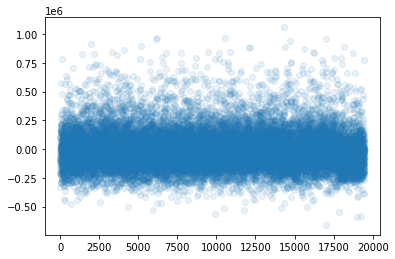

In [43]:
fig, ax = plt.subplots()
ax.scatter(x=range(y_hat.shape[0]), y=resid, alpha=0.1);

In [46]:
metrics.r2_score(learn_target, lr.predict(learn_preds_st_scaled))

0.5249276376339314

In [47]:
avg_price = np.mean(learn_target)
num= len(learn_target)

In [48]:
#predicting Y-hat + 1 (or a one unit increase in all predictors would give this r^2)
metrics.r2_score(learn_target, avg_price * np.ones(num))

0.0

In [50]:
metrics.r2_score(learn_target, (avg_price +1) * np.ones(num))

-1.7485124459426515e-11

In [51]:
scaled_df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_living15,sqft_lot15,grade_num,bed_bath_ratio,mean_price,id,zip_city,Waterfront
0,-1.11572,-0.35178,-1.55982,-1.06182,-0.38158,-0.87574,-0.73923,-0.97564,-0.42036,-0.53006,2.24346,0.00000,0.85470,1.39436,-0.05696
1,0.20606,-0.35178,0.28724,0.85057,-0.22479,0.97252,0.73756,-0.37210,-0.14983,-0.53006,-0.70765,0.00000,0.60609,1.39436,-0.05696
2,-1.29093,-1.52070,-1.55982,-1.62591,0.04682,-0.87574,-1.35083,1.40403,-0.09230,-1.53621,0.47280,0.00000,0.33406,-0.71718,-0.05696
3,0.48204,0.81715,1.39548,0.01132,-0.44559,-0.87574,-0.93315,-0.94115,-0.50876,-0.53006,-0.70765,0.00000,-0.75892,1.39436,-0.05696
4,0.08897,-0.35178,-0.08217,-0.37391,-0.14227,-0.87574,0.00662,-0.18242,-0.16833,0.47608,-0.41254,0.00000,-0.94412,-0.71718,-0.05696


In [52]:
# for comparison
all_formula = 'price ~ bedrooms + bathrooms + sqft_living + sqft_lot + floors + sqft_above + sqft_living15 + sqft_lot15 + grade_num + bed_bath_ratio + mean_price +id + zip_city + Waterfront '
all_formula_model = ols(formula=all_formula , data=scaled_df).fit()
all_formula_model.summary()
#rememeber all the variables that we do not have access to

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.525
Model:                            OLS   Adj. R-squared:                  0.525
Method:                 Least Squares   F-statistic:                     1654.
Date:                Wed, 14 Sep 2022   Prob (F-statistic):               0.00
Time:                        08:56:12   Log-Likelihood:                -20391.
No. Observations:               19479   AIC:                         4.081e+04
Df Residuals:                   19465   BIC:                         4.092e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -1.863e-17      0.005  -3.77e-15      1.000      -0.010       0.010
bedrooms          -0.1252      0.013     -9.962      0.000      -0.150      -0.101
bathrooms          0.0660      0.017      3.808      0.000       0.032       0.100
sqft_living        0.4559      0.012     36.818      0.000       0.432       0.480
sqft_lot           0.0154      0.009      1.786      0.074      -0.001       0.032
floors            -0.0277      0.007     -3.839      0.000      -0.042      -0.014
sqft_above        -0.1246      0.011    -10.999      0.000      -0.147      -0.102
sqft_living15      0.1911      0.008     23.800      0.000       0.175       0.207
sqft_lot15        -0.0493      0.009     -5.585      0.000      -0.067      -0.032
grade_num          0.3535      0.008     45.158      0.000       0.338       0.369
bed_bath_ratio     0.0959      0.014      6.882      0.000       0.069       0.123
mean_price     -5.749e-16   3.28e-17    -17.547      0.000   -6.39e-16   -5.11e-16
id                -0.0091      0.005     -1.829      0.067      -0.019       0.001
zip_city           0.2356      0.006     41.858      0.000       0.225       0.247
Waterfront         0.0906      0.005     18.234      0.000       0.081       0.100
==============================================================================
Omnibus:                     3623.116   Durbin-Watson:                   1.955
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9538.156
Skew:                           1.013   Prob(JB):                         0.00
Kurtosis:                       5.765   Cond. No.                     6.49e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.19e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [ ]:
#what is the most robust model you can build using the least amount of variables 
#we are starting from 0 and seeing if we can improve on that 
# the project is about progressing forward thru different models 
# it might be the case that the simpler modelss are better! 

#for the finally pretty print out use ols; for academic purposes use sklearn 